# Explore and Summarize Data - Loan Data

## Introduction

> The purspose of this project is to explore and analyze a certain data set. The data set I have chosen for this project is Prosper Loan Data. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information. The full dataset can be seen [Here](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data/blob/master/Explore%20and%20Summarize%20Data%20-%20Loan%20Data/prosperLoanData.csv) and the definitions the variables can be seen [Here](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data/blob/master/Explore%20and%20Summarize%20Data%20-%20Loan%20Data/Prosper%20Loan%20Data%20-%20Variable%20Definitions%20-%20Sheet1.pdf). This full project and all files and work can be seen on [This Github Repository](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data). This project was carried out through Jupyter Notebooks using [IRkernal, which allows for the use of R in Jupyter](https://irkernel.github.io/installation/#binary-panel).

## Loading Data

In [102]:
# Installing packages to be used
install.packages("ggplot2", dependencies = T) 
install.packages("knitr", dependencies = T)
install.packages("dplyr", dependencies = T)
# They have already been installed before, hence the warning message. It is only necessary for the first time running

Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'knitr' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"


In [103]:
# Importing packages to be used
library(ggplot2)
library(knitr)
library(dplyr)

In [104]:
# Loading in dataset, setting to variable 'data'
data <- read.csv('prosperLoanData.csv')

In [105]:
# variables in dataset
names(data)

[1] "ListingKey"                          "ListingNumber"                      
 [3] "ListingCreationDate"                 "CreditGrade"                        
 [5] "Term"                                "LoanStatus"                         
 [7] "ClosedDate"                          "BorrowerAPR"                        
 [9] "BorrowerRate"                        "LenderYield"                        
[11] "EstimatedEffectiveYield"             "EstimatedLoss"                      
[13] "EstimatedReturn"                     "ProsperRating..numeric."            
[15] "ProsperRating..Alpha."               "ProsperScore"                       
[17] "ListingCategory..numeric."           "BorrowerState"                      
[19] "Occupation"                          "EmploymentStatus"                   
[21] "EmploymentStatusDuration"            "IsBorrowerHomeowner"                
[23] "CurrentlyInGroup"                    "GroupKey"                           
[25] "DateCreditPulled"                    "CreditScoreRangeLower"              
[27] "CreditScoreRangeUpper"               "FirstRecordedCreditLine"            
[29] "CurrentCreditLines"                  "OpenCreditLines"                    
[31] "TotalCreditLinespast7years"          "OpenRevolvingAccounts"              
[33] "OpenRevolvingMonthlyPayment"         "InquiriesLast6Months"               
[35] "TotalInquiries"                      "CurrentDelinquencies"               
[37] "AmountDelinquent"                    "DelinquenciesLast7Years"            
[39] "PublicRecordsLast10Years"            "PublicRecordsLast12Months"          
[41] "RevolvingCreditBalance"              "BankcardUtilization"                
[43] "AvailableBankcardCredit"             "TotalTrades"                        
[45] "TradesNeverDelinquent..percentage."  "TradesOpenedLast6Months"            
[47] "DebtToIncomeRatio"                   "IncomeRange"                        
[49] "IncomeVerifiable"                    "StatedMonthlyIncome"                
[51] "LoanKey"                             "TotalProsperLoans"                  
[53] "TotalProsperPaymentsBilled"          "OnTimeProsperPayments"              
[55] "ProsperPaymentsLessThanOneMonthLate" "ProsperPaymentsOneMonthPlusLate"    
[57] "ProsperPrincipalBorrowed"            "ProsperPrincipalOutstanding"        
[59] "ScorexChangeAtTimeOfListing"         "LoanCurrentDaysDelinquent"          
[61] "LoanFirstDefaultedCycleNumber"       "LoanMonthsSinceOrigination"         
[63] "LoanNumber"                          "LoanOriginalAmount"                 
[65] "LoanOriginationDate"                 "LoanOriginationQuarter"             
[67] "MemberKey"                           "MonthlyLoanPayment"                 
[69] "LP_CustomerPayments"                 "LP_CustomerPrincipalPayments"       
[71] "LP_InterestandFees"                  "LP_ServiceFees"                     
[73] "LP_CollectionFees"                   "LP_GrossPrincipalLoss"              
[75] "LP_NetPrincipalLoss"                 "LP_NonPrincipalRecoverypayments"    
[77] "PercentFunded"                       "Recommendations"                    
[79] "InvestmentFromFriendsCount"          "InvestmentFromFriendsAmount"        
[81] "Investors"

> There are a lot of variables here and we are going to narrow these down to 11 variables to perform an analysis on. These variables will be:
> * Term
> * BorrowerAPR
> * BankcardUtilization
> * IncomeRange
> * LoanOriginalAmount
> * InquiriesLast6Months
> * EmploymentStatus
> * CreditScoreRangeLower
> * CreditScoreRangeUpper
> * LoanStatus
> * ProsperScore

> I feel that these variables will provide good insight on loans off of eachother, for example, how does employment status affect the inquiries in the past 6 months? How does credit score affect the loan amount? These variables should provide good insight into different types of loans and how they affect other variables.

> In the end of this analysis, we are going to figure out how to get the highest Prosper Score to get the best available loans.

In [106]:
# Getting the variables we want to keep
vars <- c('Term','BorrowerAPR','BankcardUtilization','IncomeRange','LoanOriginalAmount','InquiriesLast6Months','EmploymentStatus','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus','ProsperScore')

# Assigning the variables we want to a seperate dataset
newData <- data[vars]

# Showing the names of the new dataset to make sure we got the correct variables
names(newData)

[1] "Term"                  "BorrowerAPR"           "BankcardUtilization"  
 [4] "IncomeRange"           "LoanOriginalAmount"    "InquiriesLast6Months" 
 [7] "EmploymentStatus"      "CreditScoreRangeLower" "CreditScoreRangeUpper"
[10] "LoanStatus"            "ProsperScore"

## Univariate Analysis

### Term

> The length of the loan expressed in months.

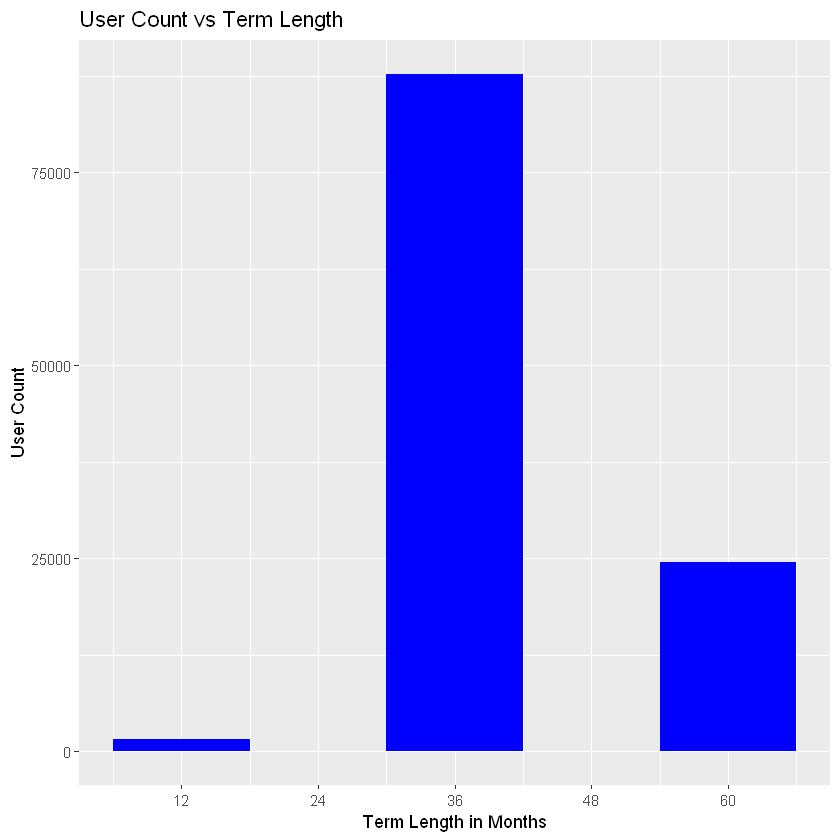

In [107]:
# Creating dataframe for Term variable
termData <- newData['Term']

# Creating chart for new dataframe
termChart <- ggplot(aes(x = Term), data = termData) +
                geom_histogram(binwidth = 12, fill = 'blue') +
                scale_x_continuous(breaks = seq(0, 60, 12))

# Labeling dataframe
termChart + ggtitle('User Count vs Term Length') +
            xlab('Term Length in Months') +
            ylab('User Count')

> We can see from this chart that the terms offered by Prosper are either 12 months, 36 months, or 60 months. 1, 3, or 5 years. Nothing inbetween. From the user count, the most popular term length is 3 years, followed by significantly less users at 5 year terms. The 1 year term is very unpopular by a user count perspective.

### Borrower APR

> The Borrower's Annual Percentage Rate (APR) for the loan. 

Warning message:
"Removed 25 rows containing non-finite values (stat_bin)."


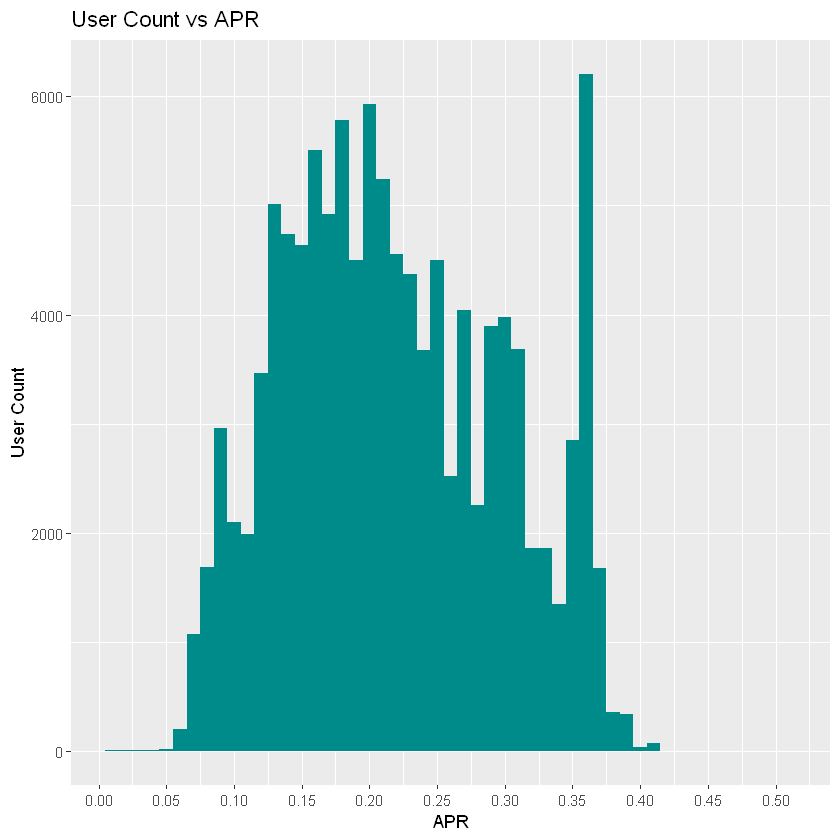

In [108]:
# Creating dataframe for BorrowerAPR variable
aprData <- newData['BorrowerAPR']

# Creating chart for new dataframe
aprChart <- ggplot(aes(x = BorrowerAPR), data = aprData) +
                geom_histogram(binwidth = 0.01, fill = 'cyan4') +
                scale_x_continuous(breaks = seq(0, 0.5, 0.05))

# Labeling chart
aprChart + ggtitle('User Count vs APR') +
            xlab('APR') +
            ylab('User Count')

> APR is really spread out all over the place. There really isnt one APR that is significantly more common than the others. The count with the highest is around ~0.38 but there is a very even grouping of users with APR all over the chart.

### Bankcard Utilization

> The percentage of available revolving credit that is utilized at the time the credit profile was pulled.

Warning message:
"Removed 25854 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


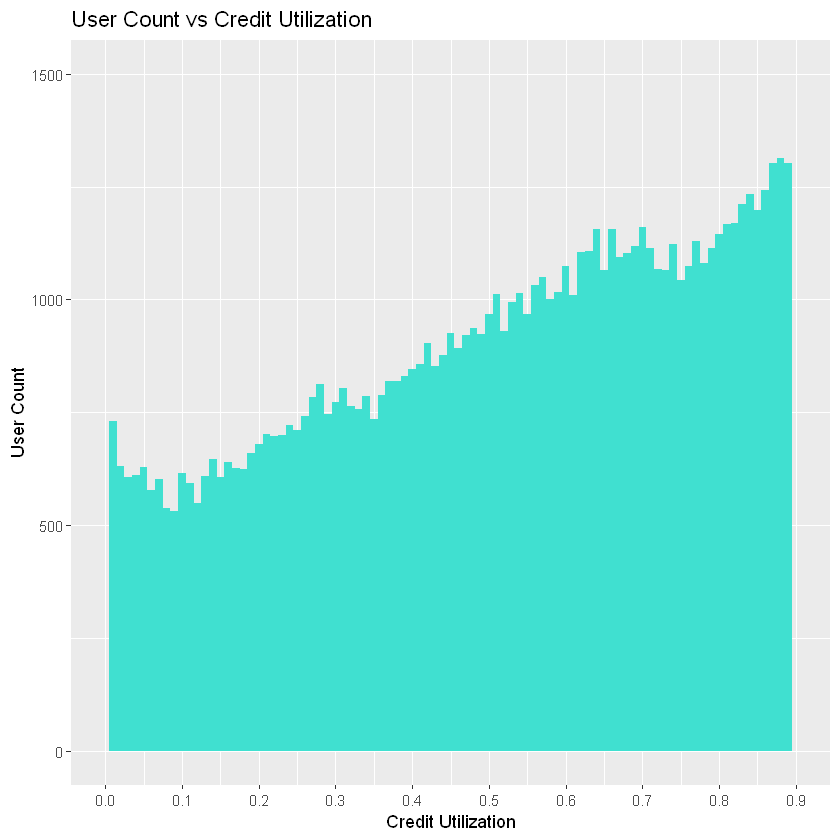

In [109]:
# Creating dataframe for BankcardUtilization variable
bankData <- newData['BankcardUtilization']

# Creating chart for new dataframe
bankChart <- ggplot(aes(x = BankcardUtilization), data = bankData) +
                geom_histogram(binwidth = 0.01, fill = 'turquoise') +
                scale_x_continuous(limits = c(0,0.9), breaks = seq(0, 0.9, 0.1)) +
                scale_y_continuous(limits = c(0,1500))

# Labeling chart
bankChart + ggtitle('User Count vs Credit Utilization') +
            xlab('Credit Utilization') +
            ylab('User Count')

> More users have a higher credit utilization. Fewer users have a lower credit utilization. We could infer from this that as credit utilization increases, more people will look into getting a loan, probably trying to pay down on their credit cards. As credit utilization increases, the chance a person seek a loan is higher.

### Income Range

> The income range of the borrower at the time the listing was created.

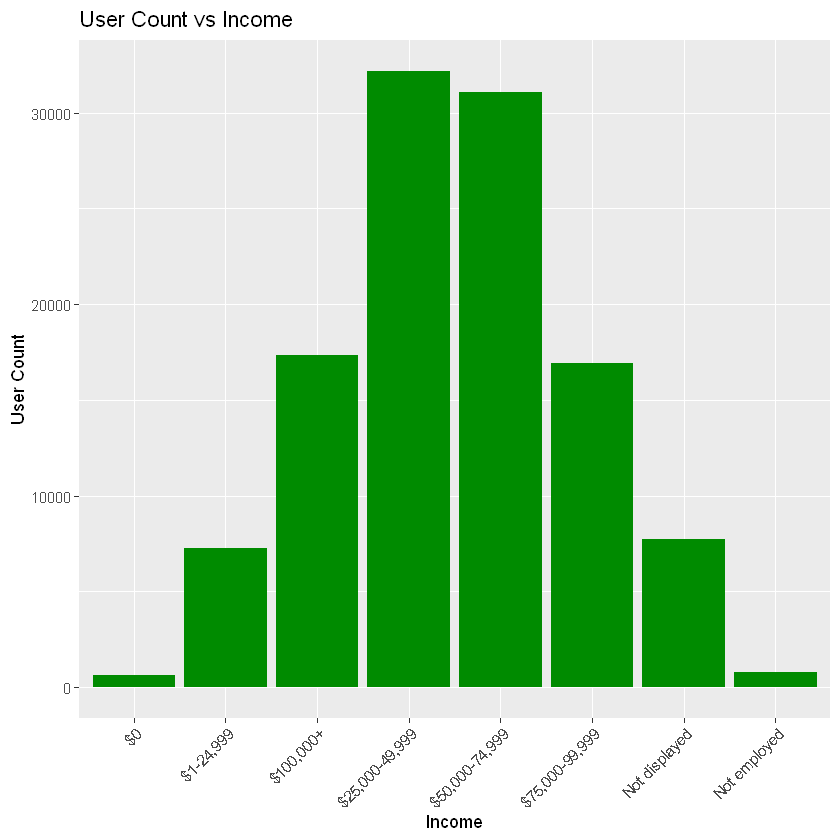

In [110]:
# Creating dataframe for IncomeRange variable
incomeData <- newData['IncomeRange']

# Creating chart for new dataframe
incomeChart <- ggplot(aes(x = IncomeRange), data = incomeData) +
                geom_bar(fill = 'green4') +
                theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

# Labeling chart
incomeChart + ggtitle('User Count vs Income') +
            xlab('Income') +
            ylab('User Count')

> Most users have an income of 25,000 - 45,000, with somewhat fewer having an income between 50,000 - 74,999.

### Original Loan Amount

> The origination amount of the loan.

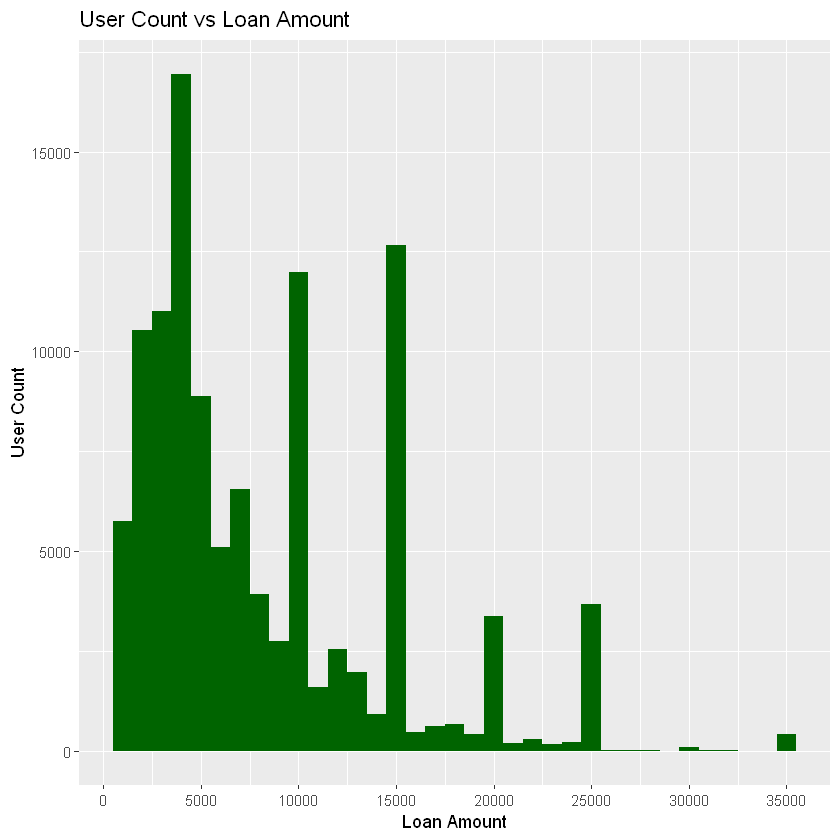

In [111]:
# Creating dataframe for LoanOriginalAmount variable
loanData <- newData['LoanOriginalAmount']

# Creating chart for new dataframe
loanChart <- ggplot(aes(x = LoanOriginalAmount), data = loanData) +
                geom_histogram(binwidth = 1000, fill = 'darkgreen') +
                scale_x_continuous(breaks = seq(0, 35000, 5000))

# Labeling chart
loanChart + ggtitle('User Count vs Loan Amount') +
            xlab('Loan Amount') +
            ylab('User Count')

> This chart shows that there are loans for any amounts between 0 and 35,000. The interesting thing here to note is that big whole numbers are much more common than other numbers. For example, there is a spike in user count for 5000, 10000, 15000, 20000, etc. These big rounded numbers all have a spike in users and could tell us that a user would prefer a loan of 15,000 over 14,576 for example. These big rounded numbers are much more attractive from a general user perspective. This could also show us that loan companies typically give out loans of these big whole numbers, rather than inbetween them.

### Inquiries Last 6 Months

> Number of inquiries in the past six months at the time the credit profile was pulled.

Warning message:
"Removed 781 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


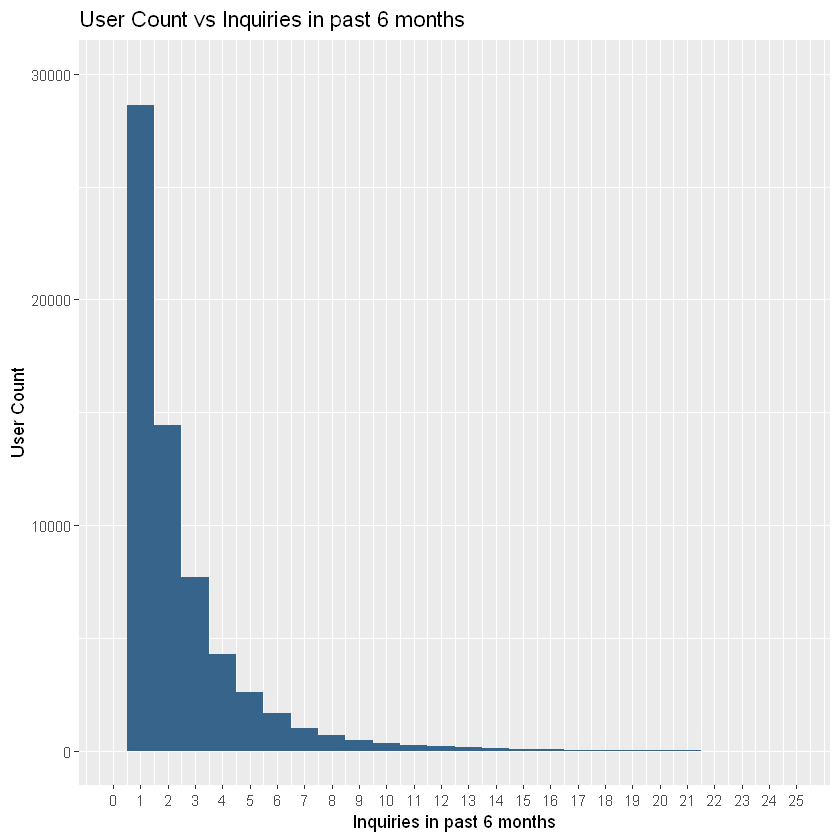

In [112]:
# Creating dataframe for InquiriesLast6Months variable
inquiryData <- newData['InquiriesLast6Months']

# Creating chart for new dataframe
inquiryChart <- ggplot(aes(x = InquiriesLast6Months), data = inquiryData) +
                geom_histogram(binwidth = 1, fill = 'steelblue4') +
                scale_x_continuous(limits = c(0,25), breaks = seq(0, 25, 1)) +
                ylim(0,30000)

# Labeling chart
inquiryChart + ggtitle('User Count vs Inquiries in past 6 months') +
            xlab('Inquiries in past 6 months') +
            ylab('User Count')

> The vast majority of users have had 0 inquiries within the past 6 months. About half of that number of people have had 1 inquiry, and half of that number of users have had 2. It keeps decreasing with this relatively half the amount of users having another inquiry.

### Employment Status

> The employment status of the borrower at the time they posted the listing.

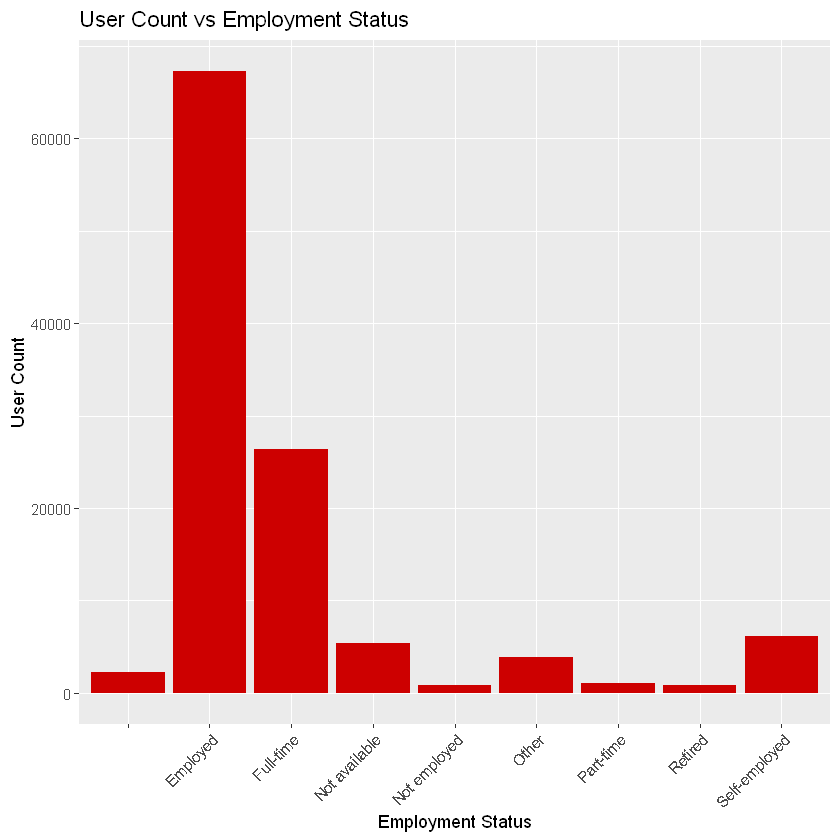

In [113]:
# Creating dataframe for EmploymentStatus variable
employmentData <- newData['EmploymentStatus']

# Creating chart for new dataframe
employmentChart <- ggplot(aes(x = EmploymentStatus), data = employmentData) +
                geom_bar(fill = "red3") +
                theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

# Labeling chart
employmentChart + ggtitle('User Count vs Employment Status') +
            xlab('Employment Status') +
            ylab('User Count')

> The vast majority of users are employed in some fashion, mostly full-time.

### Credit Score Range Lower

> The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

Warning message:
"Removed 1005 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


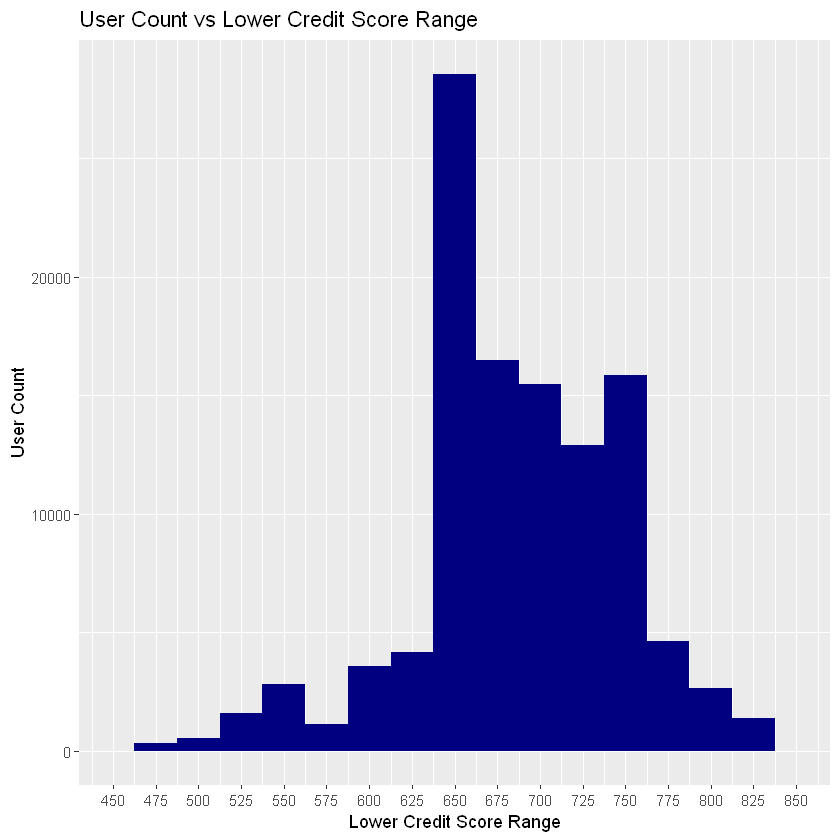

In [114]:
# Creating dataframe for CreditScoreRangeLower variable
creditLowerData <- newData['CreditScoreRangeLower']

# Creating chart for new dataframe
creditLowerChart <- ggplot(aes(x = CreditScoreRangeLower), data = creditLowerData) +
                    geom_histogram(binwidth=25, fill = 'navy') +
                    scale_x_continuous(limits = c(450,850), breaks = seq(450, 850, 25))

# Labeling chart
creditLowerChart + ggtitle('User Count vs Lower Credit Score Range') +
            xlab('Lower Credit Score Range') +
            ylab('User Count')

### Credit Score Range Upper

> The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

Warning message:
"Removed 1536 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


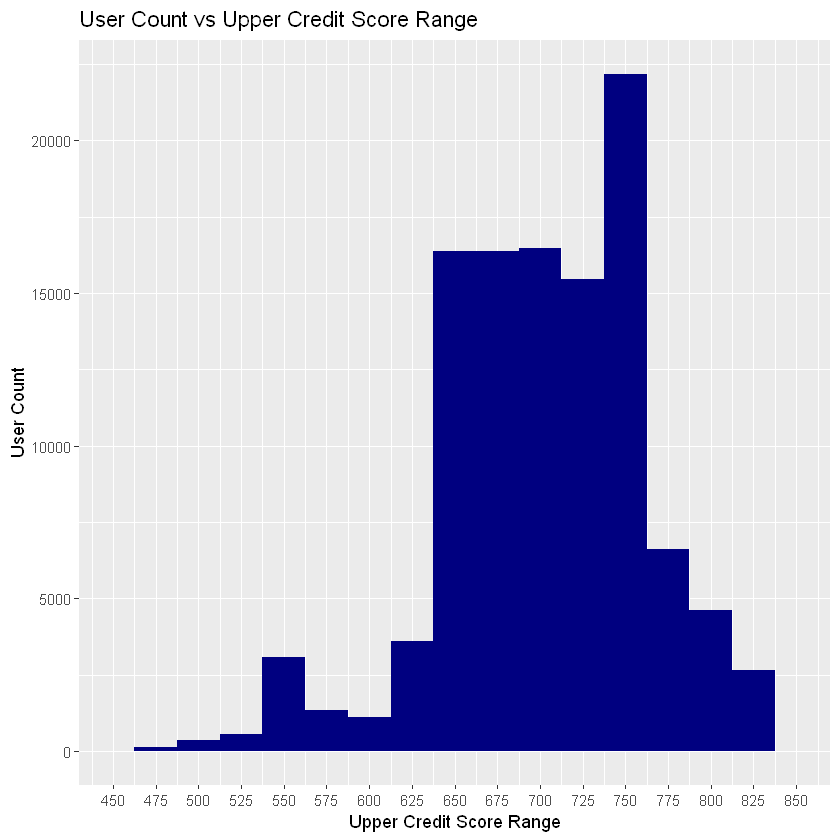

In [115]:
# Creating dataframe for CreditScoreRangeUpper variable
creditUpperData <- newData['CreditScoreRangeUpper']

# Creating chart for new dataframe
creditUpperChart <- ggplot(aes(x = CreditScoreRangeUpper), data = creditUpperData) +
                    geom_histogram(binwidth=25, fill = 'navy') +
                    scale_x_continuous(limits = c(450,850), breaks = seq(450, 850, 25))

# Labeling chart
creditUpperChart + ggtitle('User Count vs Upper Credit Score Range') +
            xlab('Upper Credit Score Range') +
            ylab('User Count')

 > These two charts go well together. Together they show that most users are between ~650 - 750 credit score. With the majority of the lower limits being around 625-675 and the majority of the upper limits being around 725 - 775. Most users fall inbetween these ranges, however some users have less than the majority of the lower limit, and some users have a score higher than the majority of the upper limit.

### Loan Status

> The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

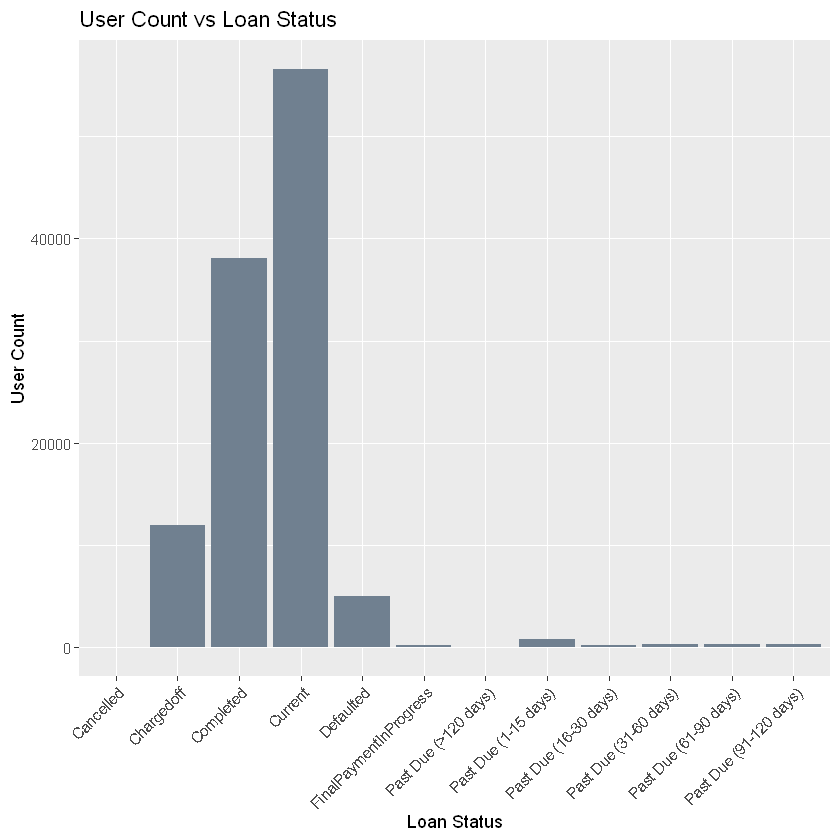

In [116]:
# Creating dataframe for LoanStatus variable
statusData <- newData['LoanStatus']

# Creating chart for new dataframe
statusChart <- ggplot(aes(x = LoanStatus), data = statusData) +
                geom_bar(fill = "slategray") +
                theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

# Labeling chart
statusChart + ggtitle('User Count vs Loan Status') +
            xlab('Loan Status') +
            ylab('User Count')

> The vast majority of users have a current loan. A significant number of users have also completed their loans. A very small amount of users have gone past due.

### Prosper Score

> A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. 

Warning message:
"Removed 29084 rows containing non-finite values (stat_count)."


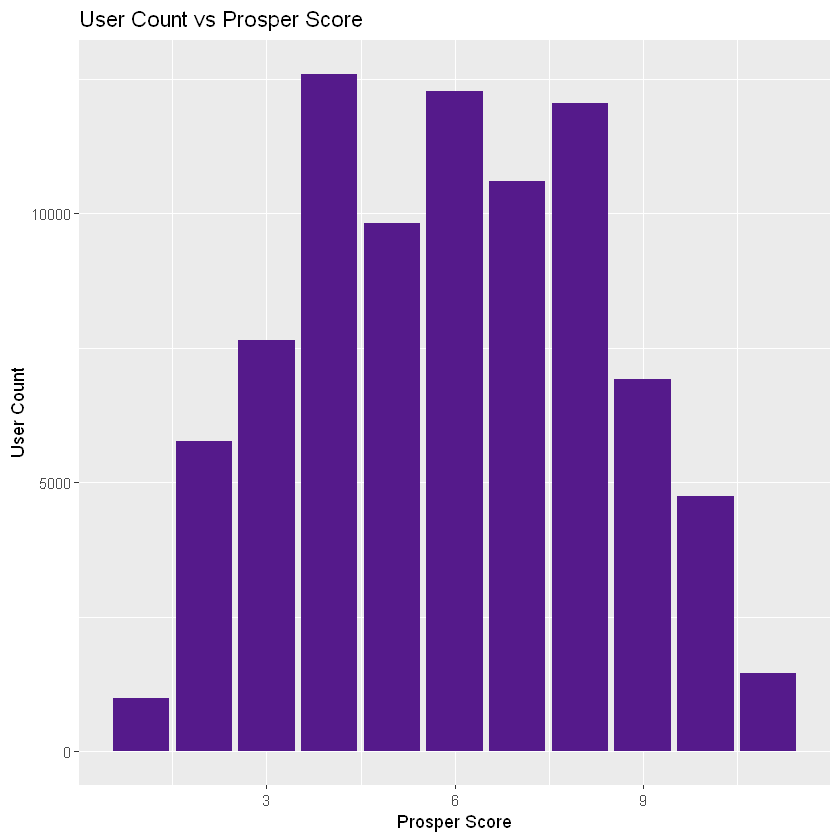

In [117]:
# Creating dataframe for ProsperScore variable
prosperData <- newData['ProsperScore']

# Creating chart for new dataframe
prosperChart <- ggplot(aes(x = ProsperScore), data = prosperData) +
                geom_bar(fill = 'purple4')

# Labeling chart
prosperChart + ggtitle('User Count vs Prosper Score') +
            xlab('Prosper Score') +
            ylab('User Count')

> Most users have a score between 4 and 8, with peaks at 4, 6, and 8.

## Bivariate Analysis

### Credit Utilization vs Credit Score

Warning message:
"Removed 7819 rows containing missing values (geom_point)."


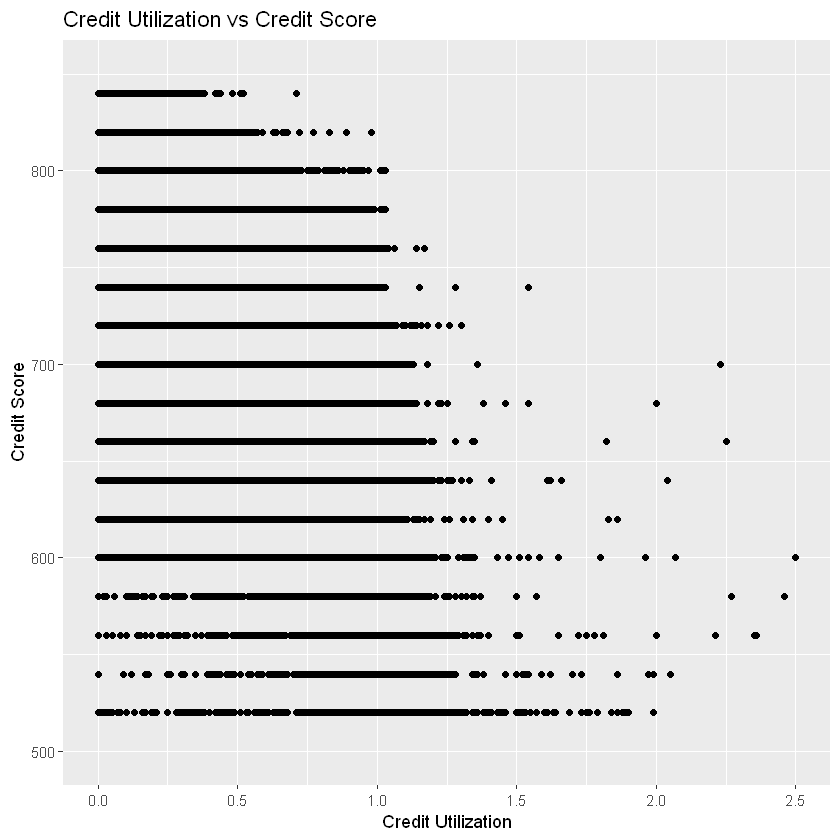

In [118]:
# Scatter plot: Credit Utilization to Credit Score
scorePlot <- ggplot(aes(x = BankcardUtilization, y = CreditScoreRangeLower), data = newData) + 
  geom_point() +
    ylim(500,850) +
    xlim(0,2.5)

# Labeling
scorePlot + ggtitle('Credit Utilization vs Credit Score') +
            xlab('Credit Utilization') +
            ylab('Credit Score')

> This scatterplot shows us that typically, as credit score increases, credit utilization decreases. Users with a lower credit score typically have a higher credit utilization.

### Income Range vs Loan Amount

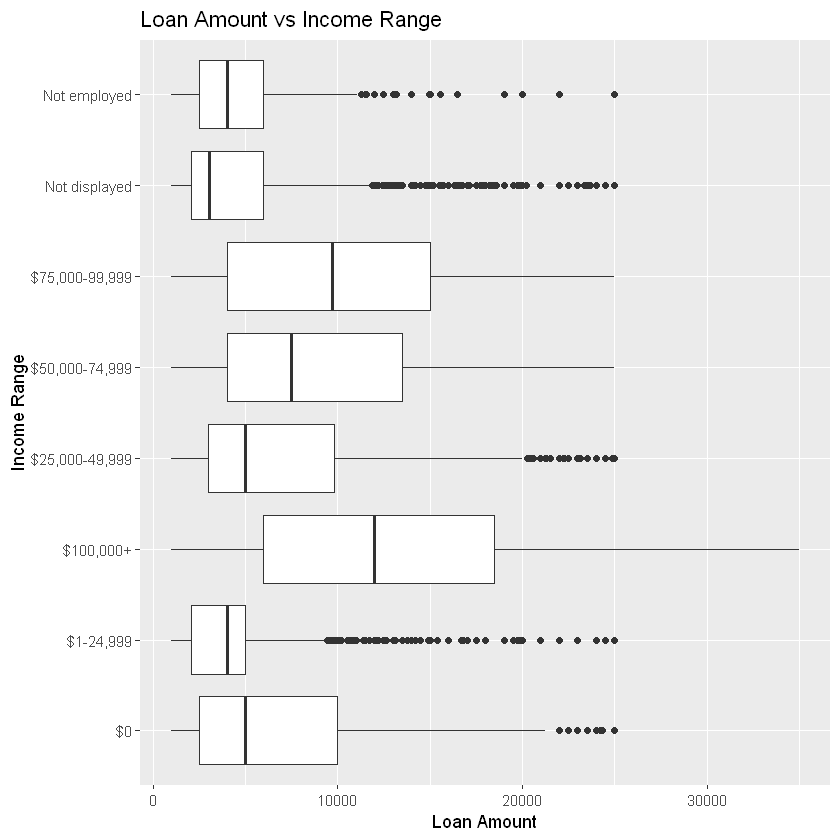

In [119]:
# Boxplot for income range vs loan amount
rangeloanplot <- ggplot(aes(x = LoanOriginalAmount, y = IncomeRange), data = newData)+
                geom_boxplot()

rangeloanplot + ggtitle('Loan Amount vs Income Range') +
            xlab('Loan Amount') +
            ylab('Income Range')

> Users with a higher income typically will have a higher loan amount. However, the most loans by far are 15,000 and under. So this could show that typically users with higher income will get approved for a higher loan amount, and they sometimes take it, but typically no matter the income level, a user will choose a loan that is 15,000 or lower

### Inquiries Last 6 Months vs Credit Score

Warning message:
"Removed 1540 rows containing missing values (geom_point)."


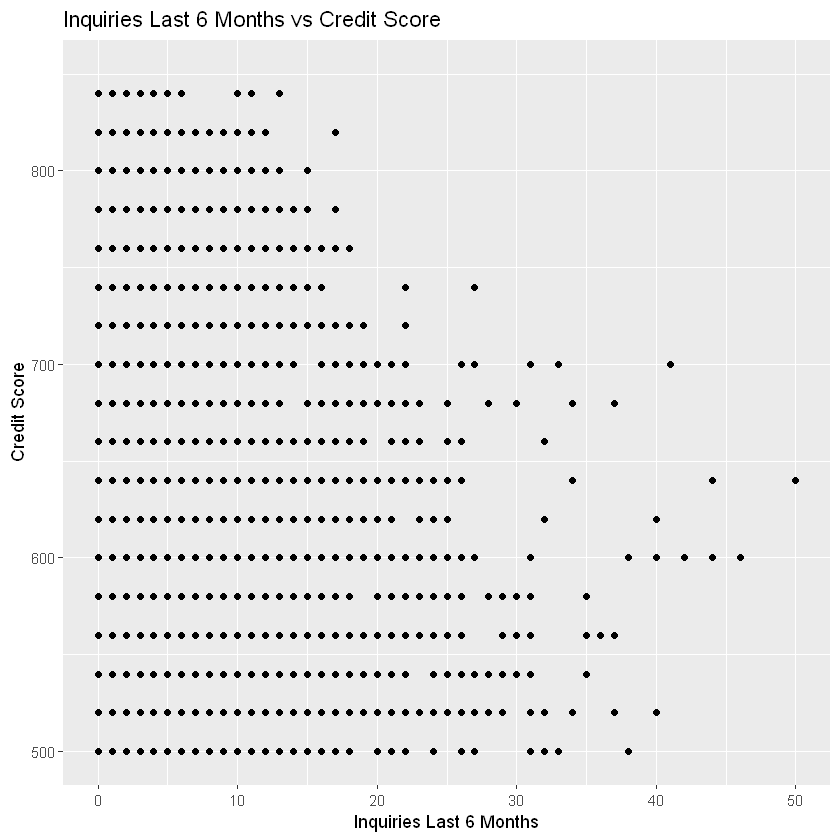

In [120]:
# Scatterplot for credit score vs inquiries in last 6 months
inquiryscoreplot <- ggplot(aes(x = InquiriesLast6Months, y = CreditScoreRangeLower), data = newData)+
                geom_point() +
                ylim(500,850) +
                xlim(0,50)

inquiryscoreplot + ggtitle('Inquiries Last 6 Months vs Credit Score') +
            xlab('Inquiries Last 6 Months') +
            ylab('Credit Score')

> Users with a higher credit score typically have less inquiries in the past 6 months than users with a lower credit score. This makes sense as taking a hard inquiry usually has a negative affect on credit score for a certain period of time.

### Term vs Loan Amount

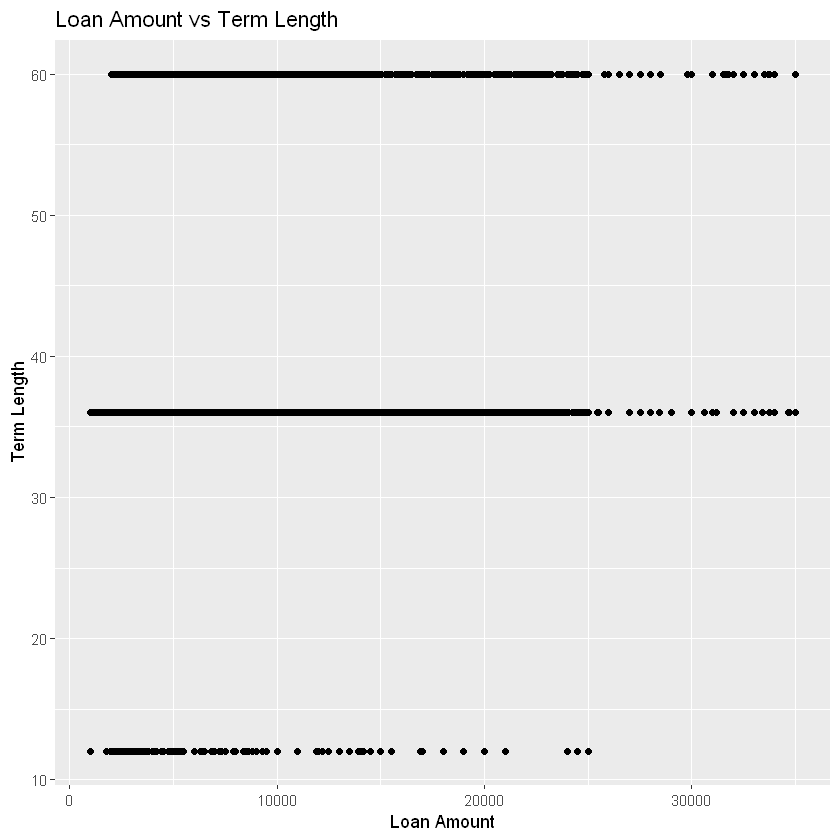

In [121]:
# Boxplot for income range vs loan amount
termloanplot <- ggplot(aes(x = LoanOriginalAmount, y = Term), data = newData)+
                geom_point()

termloanplot + ggtitle('Loan Amount vs Term Length') +
            xlab('Loan Amount') +
            ylab('Term Length')

> The 1 Year term length typically has a lower loan amount than the other term lengths. The 3 year and 5 year lengths have around the same loan amounts.

### APR vs Loan Status

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."


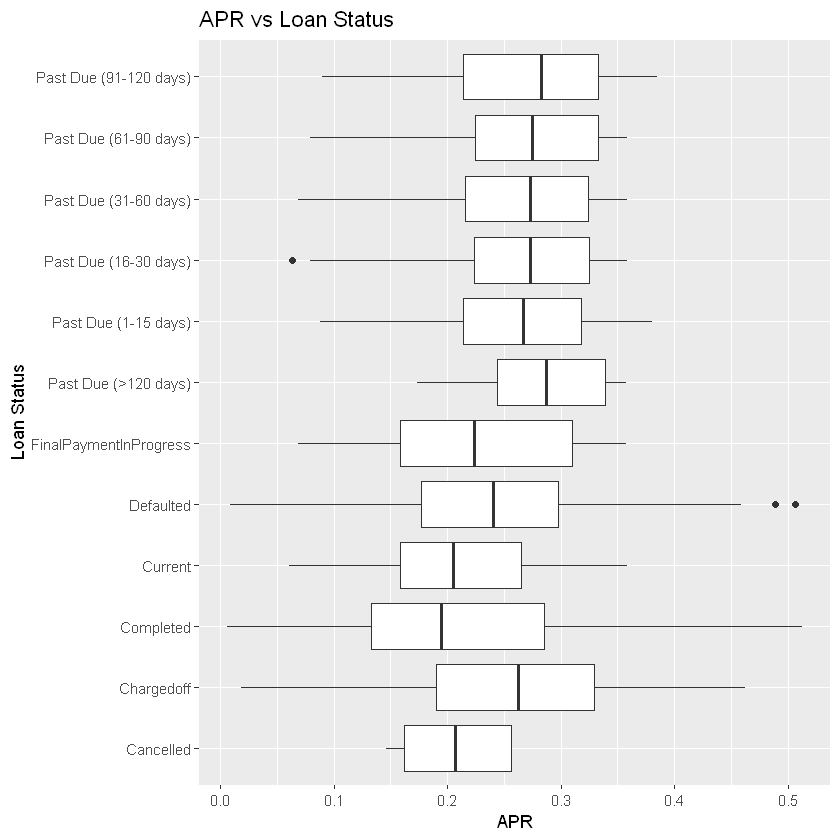

In [122]:
# Boxplot for income range vs loan amount
statusloanplot <- ggplot(aes(x = BorrowerAPR, y = LoanStatus), data = newData)+
                geom_boxplot()

statusloanplot + ggtitle('APR vs Loan Status') +
            xlab('APR') +
            ylab('Loan Status')

> The interesting thing about this chart is that APR really does not have much of an affect on the status of the loan. Every status covers almost every APR value. So the status of the loan is really on an individual basis, and the APR does not seem to have that great of an effect on the status.

## Multivariate Analysis
> (or how to get the highest Prosper Score)

### Credit Score vs Loan Amount colored by Prosper Score

Warning message:
"Removed 1005 rows containing missing values (geom_point)."


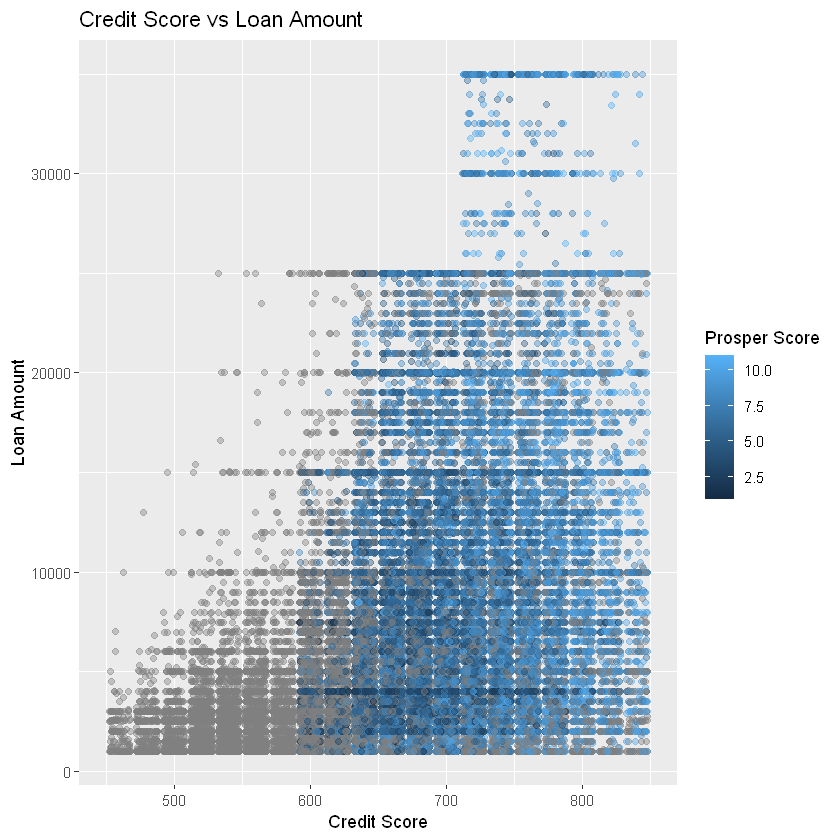

In [123]:
chart1 <- ggplot(
  data = newData,
  aes(x = CreditScoreRangeLower, y = LoanOriginalAmount)) + 
  geom_jitter(aes(color = ProsperScore), alpha = 0.4) +
  xlim(450,850) +
    labs(title = "Credit Score vs Loan Amount",
       x = "Credit Score",
       y = "Loan Amount",
       color = "Prosper Score")

chart1

> This chart shows that the higher the loan amount a user recieves, the higher their credit score and prosper score is. Credit score and prosper score seem to both increase together. The very interesting thing about this chart is that a user typically needs at least a 600 credit score to even get assigned a prosper score above 1. Very few users below 600 credit have a prosper score higher than 1, however, that doesnt always mean they cant get a higher loan. And users with a high credit score can also have a prosper score of 1. There are definetely many factors that attribute to the prosper score.

### Inquiries vs Credit Utilization colored by Prosper Score

Warning message:
"Removed 37296 rows containing missing values (geom_point)."


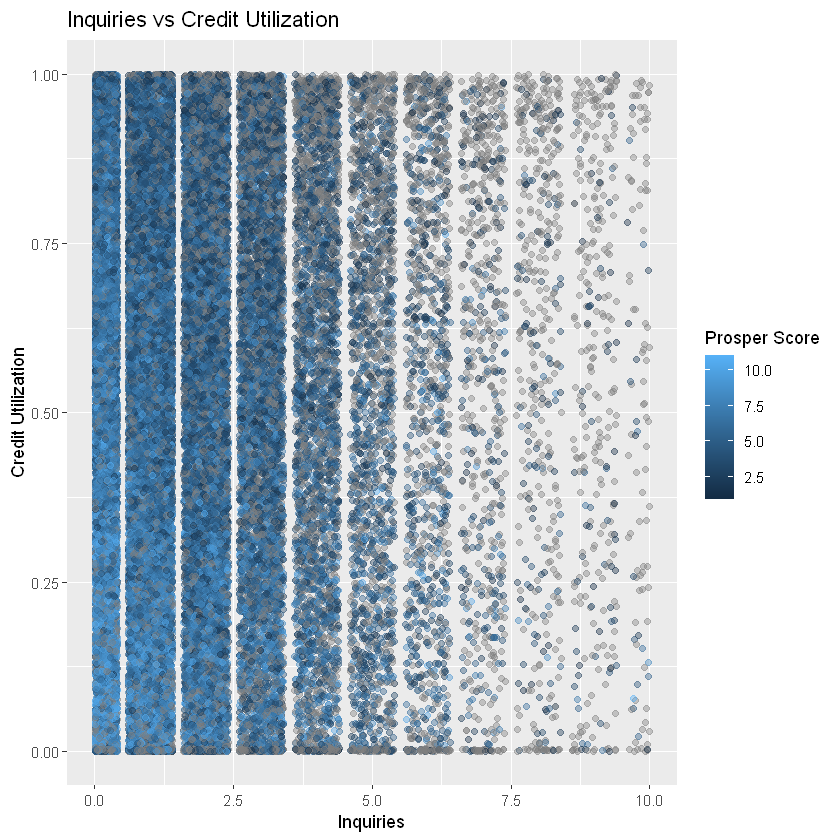

In [124]:
chart2 <- ggplot(
  data = newData,
  aes(x = InquiriesLast6Months, y = BankcardUtilization)) + 
  geom_jitter(aes(color = ProsperScore), alpha = 0.4) +
      xlim(0,10) +
      ylim(0,1) +
    labs(title = "Inquiries vs Credit Utilization",
       x = "Inquiries",
       y = "Credit Utilization",
       color = "Prosper Score")

chart2

> This plot shows that typically the fewer inquries, and lower credit utilization, the higher change a user will recieve a higher prosper score. The greatest density of the highest scores is around the area of lowest credit utilization and fewest inquiries. We know that having more inquiries negatively affects credit score, and higher credit utilization negatively affects credit score, so this shows that essentially, a higher credit score will potentially lead to a higher prosper score, like the chart above shows.

### Loan Status vs Employment Status colored by Prosper Score

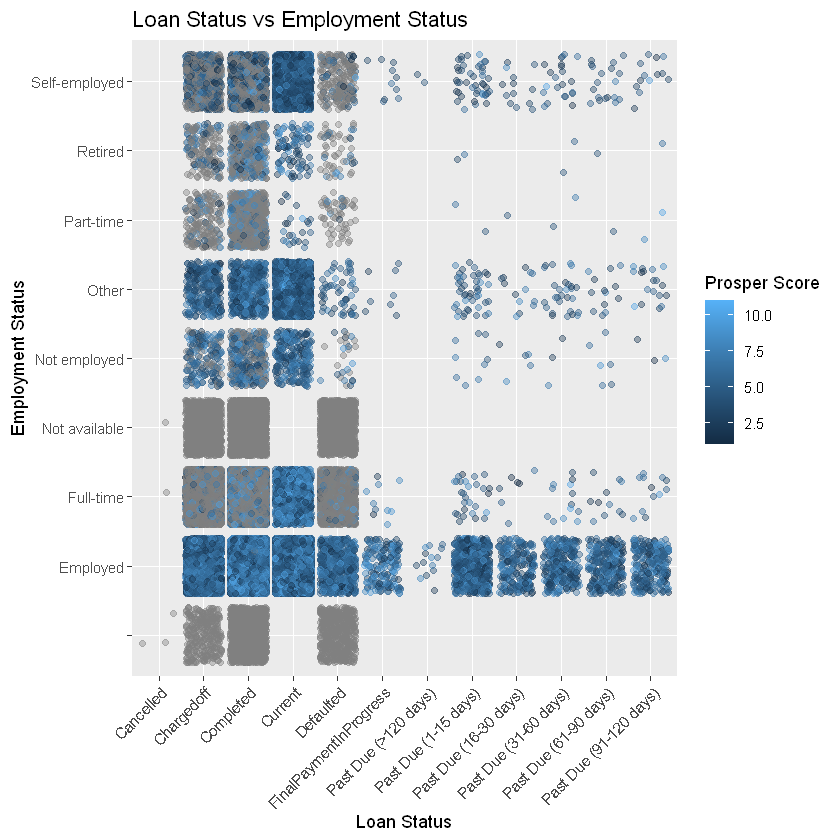

In [125]:
chart3 <- ggplot(
  data = newData,
  aes(x = LoanStatus, y = EmploymentStatus)) + 
  geom_jitter(aes(color = ProsperScore), alpha = 0.4) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    labs(title = "Loan Status vs Employment Status",
       x = "Loan Status",
       y = "Employment Status",
       color = "Prosper Score")

chart3

> This plot is very interesting because it shows that being employed at all, in any fashion, very greatly increases your prosper score. Even if the user is past due by any amount of time, they still have a greater prosper score than those who are not employed. This shows that not being able to verify employment (The Not Available tab) the user will automatically recieve a prosper score of 1, which is the lowest. Even saying unemployed will generally grant a higher prosper score than showing nothing at all. This also shows that the loan status that has the highest prosper score is having a current loan active.

### Income Range vs Borrower APR colored by Prosper Score

Warning message:
"Removed 25 rows containing missing values (geom_point)."


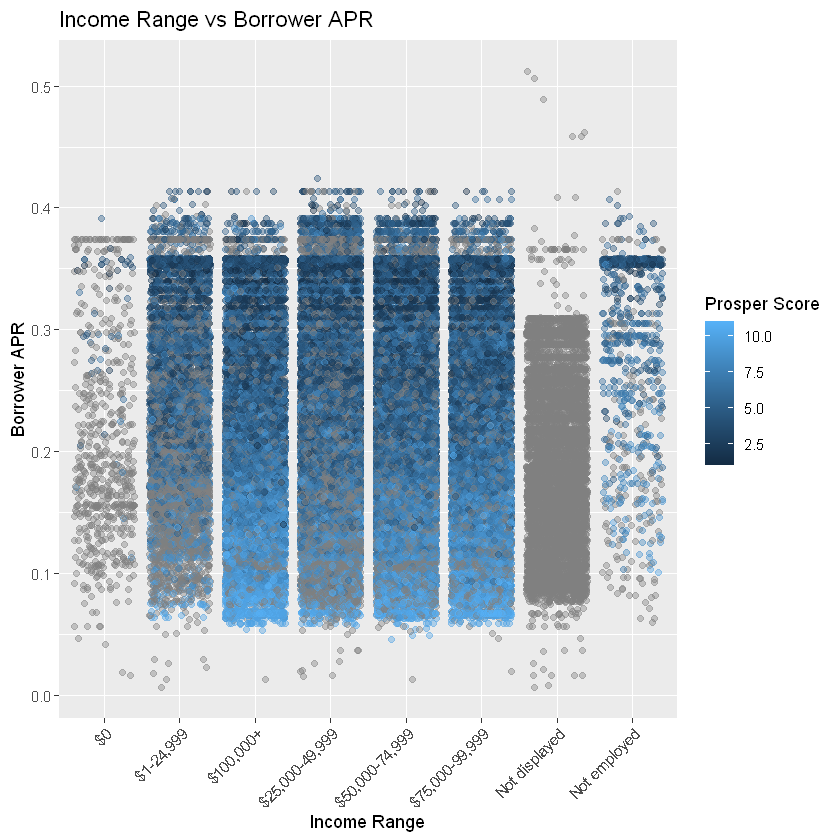

In [126]:
chart4 <- ggplot(
  data = newData,
  aes(x = IncomeRange, y = BorrowerAPR)) + 
  geom_jitter(aes(color = ProsperScore), alpha = 0.4) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    labs(title = "Income Range vs Borrower APR",
       x = "Income Range",
       y = "Borrower APR",
       color = "Prosper Score")

chart4

> This plot shows that having an income somewhere between 25,000 - 100,000 will net you the highest prosper score and therefore the lowerst APR for a loan. This plot is really interesting again because not verifying your income will get the user the lowerst prosper score, even lower than saying you are not employed.

### Term Length vs Loan Amount colored by Prosper Score

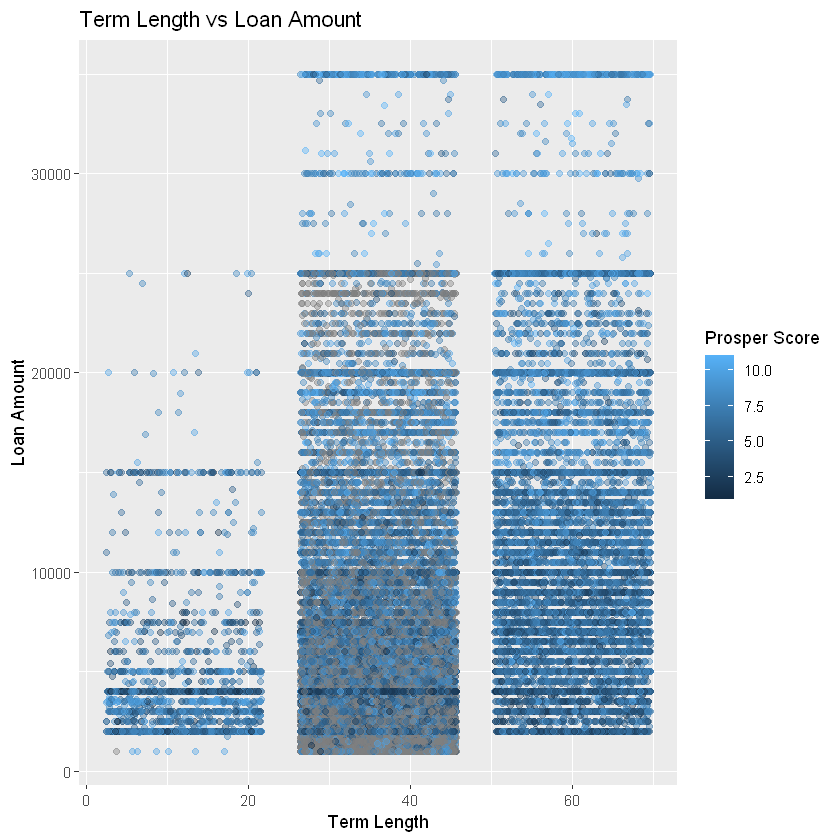

In [127]:
chart5 <- ggplot(
  data = newData,
  aes(x = Term, y = LoanOriginalAmount)) + 
  geom_jitter(aes(color = ProsperScore), alpha = 0.4) +
    labs(title = "Term Length vs Loan Amount",
       x = "Term Length",
       y = "Loan Amount",
       color = "Prosper Score")

chart5

> There is not much affect here on the prosper score by the term length or the loan amount. The takeaway from this plot is that the longer terms allow for a higher loan amount, and that typically users that take the 5 year term have a higher prosper score in general as opposed to the other term lengths.

### Term Length vs APR colored by Prosper Score

Warning message:
"Removed 25 rows containing missing values (geom_point)."


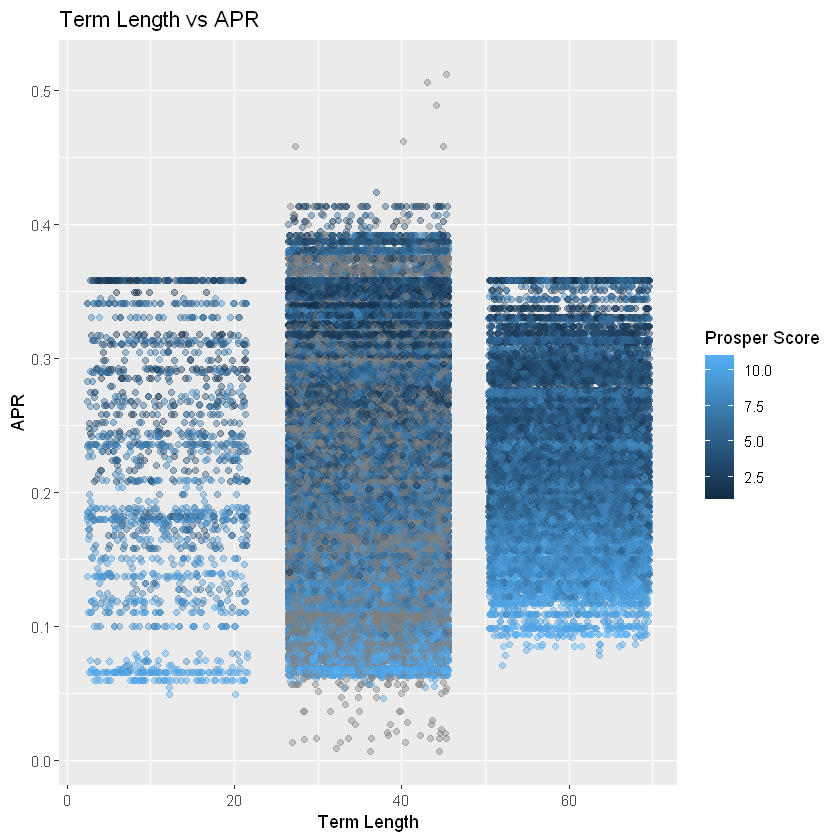

In [128]:
chart6 <- ggplot(
  data = newData,
  aes(x = Term, y = BorrowerAPR)) + 
  geom_jitter(aes(color = ProsperScore), alpha = 0.4) +
    labs(title = "Term Length vs APR",
       x = "Term Length",
       y = "APR",
       color = "Prosper Score")

chart6

> This plot shows that the users with the highest prosper score can choose to have a 5 year term with a very low APR. The lower the prosper score, the higher the APR, and the less options in term length. The most users with a high prosper score are in the 5 year term with a low APR, andthe most users with a lower prosper score are in a 3 year term with a higher APR.

### How to get the highest Prosper Score

> To get the highest Prosper Score and therefore the most choices in your loan and the lowest APR, the user needs to achieve a few different things to get the greatest chance at a high Prosper Score. First, the user should have a high credit score. MINIMUM of 600. The higher the better, but at least 600 credit score. The user should have a very low number of inquries in the past 6 months. Preferably none, which in turn will also help boost the users credit score. The user should be employed, preferably full-time, and the user should have an income of at least 25,000 USD, again, the higher the better. These are the minimum requirements that need to be met to achieve a high prosper score, and therefore get the most options in their loan, and the lowest APR. Having a high prosper score will essentially 'unlock' the options to have a 5 year term at a very low APR, and a large loan amount if the user wishes.

## Final Plots

### Bankcard Utilization

Warning message:
"Removed 25854 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


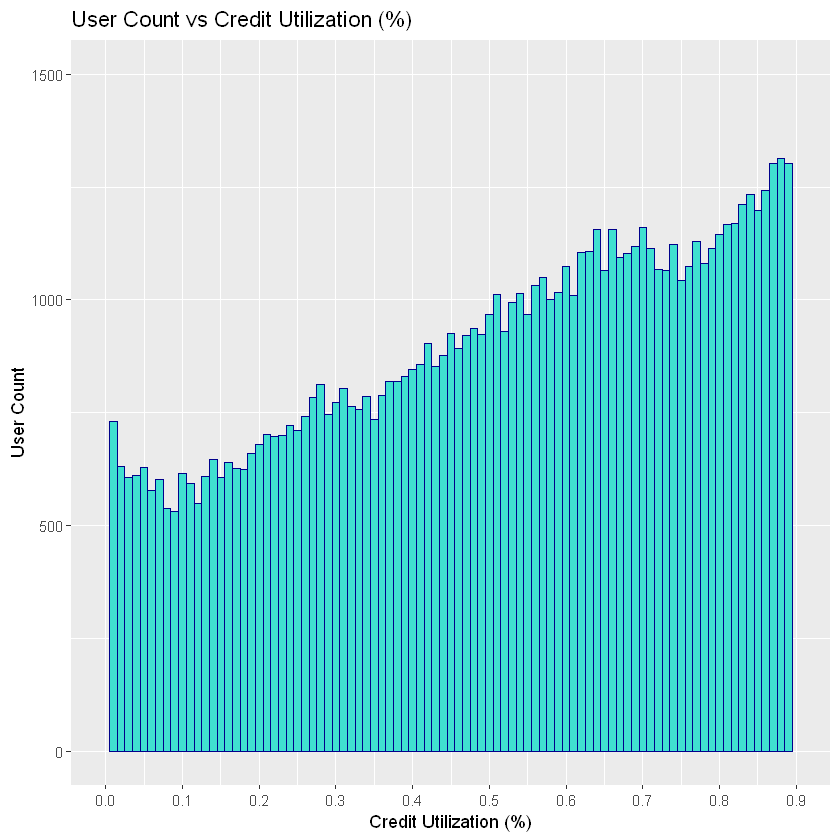

In [129]:

bankChart <- ggplot(aes(x = BankcardUtilization), data = bankData) +
                geom_histogram(binwidth = 0.01, fill = 'turquoise', color = 'blue4') +
                scale_x_continuous(limits = c(0,0.9), breaks = seq(0, 0.9, 0.1)) +
                scale_y_continuous(limits = c(0,1500))

bankChart + ggtitle('User Count vs Credit Utilization (%)') +
            xlab('Credit Utilization (%)') +
            ylab('User Count')

> The first chart I found very interesting was the credit utilization vs user count. This chart shows that the higher the credit utilization, the higher the amount of users. More users have a higher credit utilization and fewer users have lower credit utilization. This could be explained that as a user reaches a higher credit utilization, they begin to look for a loan to help them. Usually when credit utilization is very high, a user might seek out a loan for debt consolidation to help them lower their credit utilization. This chart could show that when credit utilization is high, a user is much more likely to seek out a loan than someone who has a low credit utilization.

### Credit Score vs Loan Amount colored by Prosper Score

Warning message:
"Removed 1005 rows containing missing values (geom_point)."
Warning message:
"Removed 1005 rows containing missing values (geom_point)."


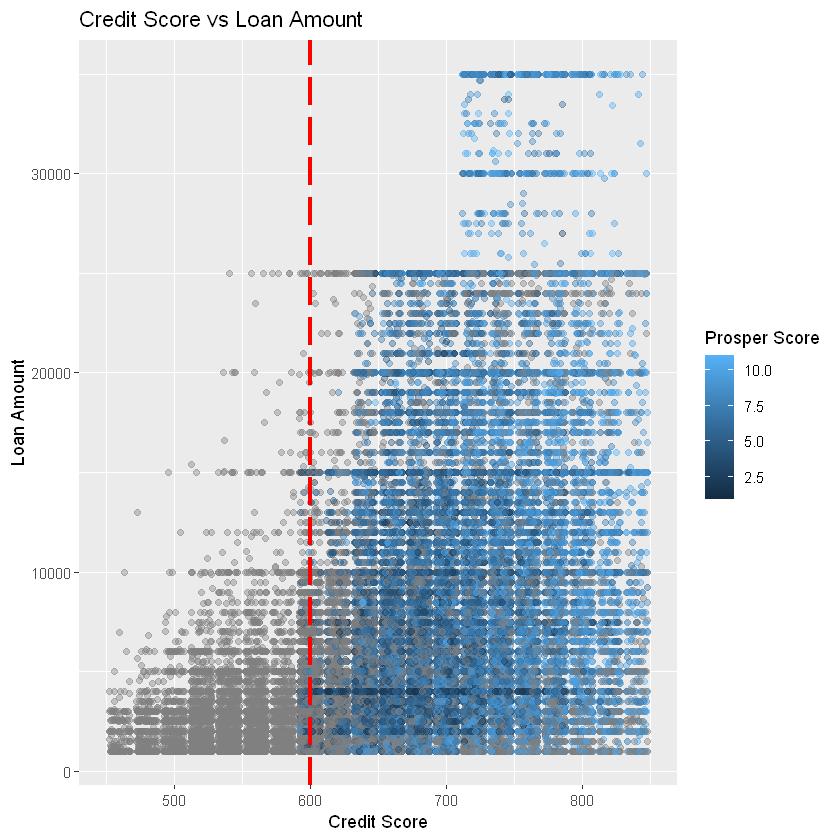

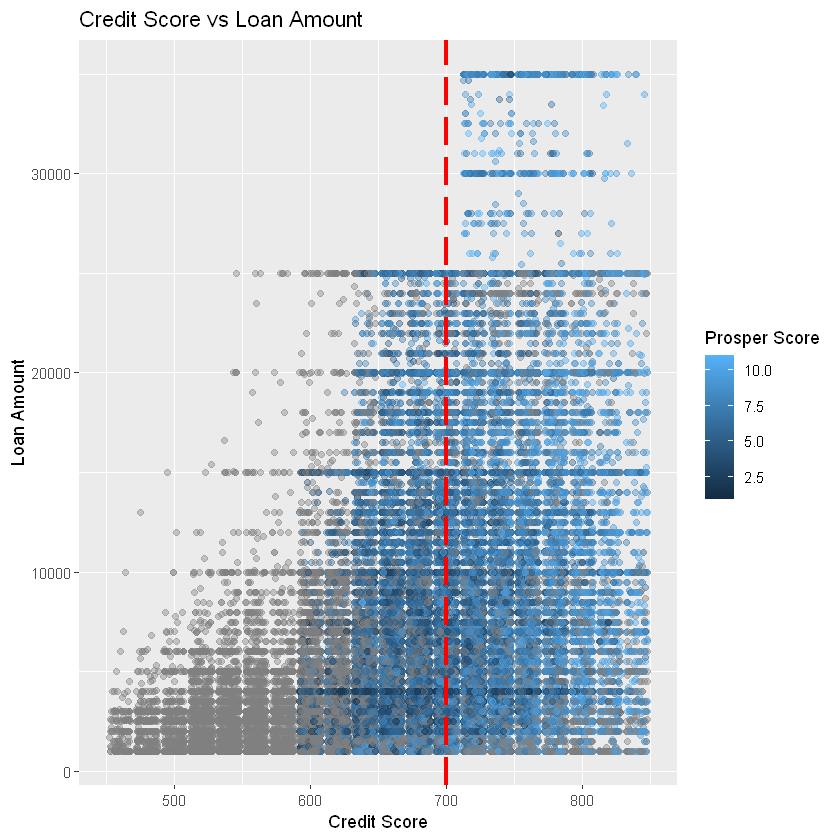

In [130]:
chart1 + geom_vline(xintercept = 600, color = 'red', linetype = 'longdash', size = 1.25)
chart1 + geom_vline(xintercept = 700, color = 'red', linetype = 'longdash', size = 1.25)

> This plot was very interesting to me, as it shows that a user needs AT LEAST a ~600 credit score to be assigned a Prosper Score above 1. There are a few outliers, some users have a Prosper Score above 1 and have a credit score lower than 600, but it is very few. Adding a line to seperate above 600 and below 600, and the contrast is stark. It is very clear to see that the vast majority of users that have a Prosper Score above 1 all have a credit score of at least 600, and usually much higher. It would seem as though 600 is about the bare minimum to recieving a score higher than 1.

> The second plot shows that for a user to recieve a loan of above 25,000 they need a minimum credit score of about 700. No users that have a credit score below 700 have recieved a loan above 25,000.

> These plots show that there are some minimum requirements involved in prosper score and loan amount. To recieve a Prosper Score above 1, a user needs a minimum of 600 credit score, and to recieve a loan above 25,000, a user needs a minimum of 700 credit score.

### Loan Status vs Employment Status colored by Prosper Score

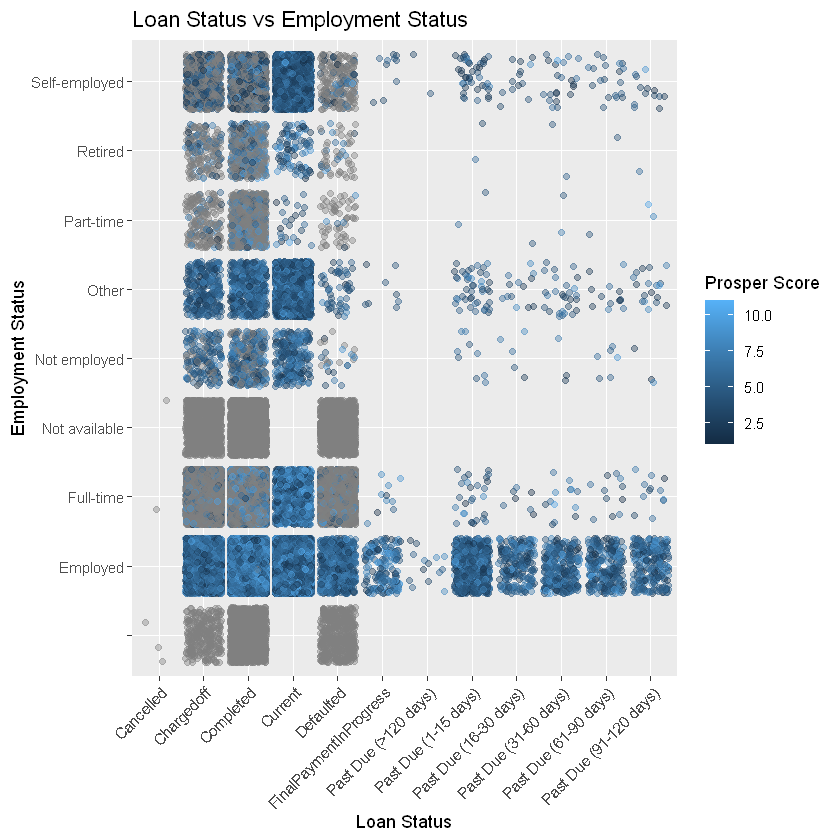

In [131]:
chart3

> The thing I noticed about this plot was how much being verified affected the Prosper Score. For example, being employed greatly increased the chances of a higher Prosper Score, but even saying your are unemployed still could potentially lead to a fairly high score. What stuck out to me was how much saying nothing affected the score. Perhaps users say 'Not Available' because they believe it would be better than saying 'Not Employed' but that is not the case. Every user that says 'Not Available' recieves the lowest Prosper Score. So if a user is unemployed and looking for a loan, they should say that they are unemployed, rather than saying nothing at all. This would likely lead to a higher score. Not giving any employment status to Prosper will lead to the lowest score.

## Reflection

> First off, the Prosper Loan dataset contains 81 variables. Doing an analysis on all 81 variables would lead to the most accurate information. However, I did an analysis on only 11 variables, and mainly trying to figure out what variables affect Prosper Score. Cutting off so much information could lead to less accurate information. A full analysis on all 81 variables would need to take place to achieve the most accurate information.

> Second, as a conclusion to finding out what variables affect the Prosper Score, we have found a general guideline to getting a chance at a high score:

> > To get the highest Prosper Score and therefore the most choices in your loan and the lowest APR, the user needs to achieve a few different things to get the greatest chance at a high Prosper Score. First, the user should have a high credit score. MINIMUM of 600. The higher the better, but at least 600 credit score. The user should have a very low number of inquries in the past 6 months. Preferably none, which in turn will also help boost the users credit score. The user should be employed, preferably full-time, and the user should have an income of at least 25,000 USD, again, the higher the better. These are the minimum requirements that need to be met to achieve a high prosper score, and therefore get the most options in their loan, and the lowest APR. Having a high prosper score will essentially 'unlock' the options to have a 5 year term at a very low APR, and a large loan amount if the user wishes.

> Finally, it is worth mentioning that most of this analysis was through Barcharts, Histograms, Scatterplots, and Jitterplots. There are many different types of charting and plotting, and creating many different charts on the same information could lead to different views on the same data. This analysis mainly focused on one chart per dataset, which could potentially skew some information, for example, some outliers had to be cut off to fit on certain types of charts. This is why creating many viewpoints for the same information would not be redundant, but would instead be helpful in finding new ways to look at the same data, and potentially find new solutions and information about the data.